# WINE QUALITY PREDICTION APP USING AWS SAGEMAKER'S IN-BUILT XGBOOST - End-to-End
We will build a Wine Quality Prediction App to help determine the quality of wine from its composition:
- I)   PROBLEM STATEMENT & DATA COLLECTION:

You want to automatically determine the quality of wine from it's underlying components.The data is taken from the UCI datasets and you can get it from the link.  https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/

This data will be cleaned and trained using the in-built XGBoost Algorithm on AWS Sagemaker, and an endpoint will be created in AWS ,which wll be used to make predictions when given the inputs on the components in the wine.

- II)  PERFORM EXPLORATORY DATA ANALYSIS 

Inspect the data to validate the quality of the data downloaded from te UCI website. Analyse the distribution of missing values, outliers and gain other relevant insights from the model
- III) DO FEATURE ENGINEERING & SELECTION

Handle the mising values, outliers and do the necessary transformations which will ensure the data is well suited for the machine learning model.And also to maximise the insights gotten from the Exploratory Data Analysis phase.
- IV)  BUILD,TRAIN AND DEPLOY THE MODEL IN SAGEMAKER

The Boto3 package will be used to create the S3 buckets to store the preprocessed dataset.The Sagemaker's inbuilt XGBoost algorithm, will be built, trained and deployed.Including the use of optimal hyperparameters to get the best results for the RMSE( Root Mean Squared Error).An Endpoint will be created after the model is built.
The Endpoint created awill be used to predict the quality of wine when the input compositions are fed to the endpoint.

### III) FEATURE ENGINEERING & SELECTION
We will perform the following tasks in order to successfully complete the Feature Engineering
- a.) Importing the necessary Libraries and scraped data
- b.) Combining the rare quality scores
- c.) Train test split
- d.) Outliers Treatment
- e.) Preparing and exporting train data as a CSV
- f.) Preparing and exporting test data as a CSV

#### a.) Importing the necessary Libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

pd.set_option("display.max_columns",None)

import warnings
warnings.filterwarnings("ignore") 

In [3]:
#View the first 5 observations
dataset = pd.read_csv("winequality-red.csv", sep =';')

print(dataset.head())

   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        5  
1      9.8        5  
2      9.8        5 

In [4]:
#View the shape of the data
dataset.shape

(1599, 12)

#### b.) Combining the rare quality scores

<AxesSubplot:xlabel='quality', ylabel='count'>

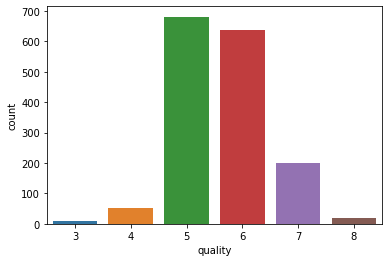

In [5]:
#Plot the count plot of the quality column
sns.countplot(x = "quality",data =dataset)

In [15]:
dataset['quality2'] = np.where((dataset['quality']==3) | (dataset['quality']==4),1,np.where(dataset['quality']==5,2,np.where(dataset['quality']==6,3,4)))
print(dataset)                        

      fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.4             0.700         0.00             1.9      0.076   
1               7.8             0.880         0.00             2.6      0.098   
2               7.8             0.760         0.04             2.3      0.092   
3              11.2             0.280         0.56             1.9      0.075   
4               7.4             0.700         0.00             1.9      0.076   
...             ...               ...          ...             ...        ...   
1594            6.2             0.600         0.08             2.0      0.090   
1595            5.9             0.550         0.10             2.2      0.062   
1596            6.3             0.510         0.13             2.3      0.076   
1597            5.9             0.645         0.12             2.0      0.075   
1598            6.0             0.310         0.47             3.6      0.067   

      free sulfur dioxide  

<AxesSubplot:xlabel='quality2', ylabel='count'>

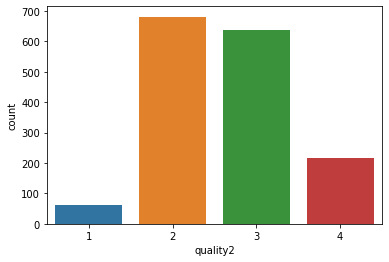

In [16]:
#Plot the count plot of the quality2 column
sns.countplot(x = "quality2",data =dataset)

In [19]:
#Deleting the 'quality' column to maintain the 'quality2' column
dataset = dataset.drop('quality',axis=1)

In [21]:
print(dataset)

      fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.4             0.700         0.00             1.9      0.076   
1               7.8             0.880         0.00             2.6      0.098   
2               7.8             0.760         0.04             2.3      0.092   
3              11.2             0.280         0.56             1.9      0.075   
4               7.4             0.700         0.00             1.9      0.076   
...             ...               ...          ...             ...        ...   
1594            6.2             0.600         0.08             2.0      0.090   
1595            5.9             0.550         0.10             2.2      0.062   
1596            6.3             0.510         0.13             2.3      0.076   
1597            5.9             0.645         0.12             2.0      0.075   
1598            6.0             0.310         0.47             3.6      0.067   

      free sulfur dioxide  

#### b.) Train test split

In [27]:
# Preparing the Dependent Variables
X = dataset.loc[:, dataset.columns != 'quality2']
X.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4


In [28]:
# Preparing the Independent Variable
y = dataset.loc[:,['quality2']]
y.head()

,quality2
0,2
1,2
2,2
3,3
4,2


In [29]:
# Use scikit learn to split the dataset
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0)

#### d.) Preparing and Exporting the train dataset as CSV

In [30]:
# Creating one training dataset
train_set = pd.concat([X_train,y_train],axis = 1)
train_set

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality2
642,9.9,0.540,0.45,2.3,0.071,16.0,40.0,0.99910,3.39,0.62,9.4,2
679,10.8,0.260,0.45,3.3,0.060,20.0,49.0,0.99720,3.13,0.54,9.6,2
473,9.9,0.350,0.55,2.1,0.062,5.0,14.0,0.99710,3.26,0.79,10.6,2
390,5.6,0.850,0.05,1.4,0.045,12.0,88.0,0.99240,3.56,0.82,12.9,4
1096,6.6,0.725,0.09,5.5,0.117,9.0,17.0,0.99655,3.35,0.49,10.8,3
...,...,...,...,...,...,...,...,...,...,...,...,...
763,9.3,0.655,0.26,2.0,0.096,5.0,35.0,0.99738,3.25,0.42,9.6,2
835,7.6,0.665,0.10,1.5,0.066,27.0,55.0,0.99655,3.39,0.51,9.3,2
1216,7.9,0.570,0.31,2.0,0.079,10.0,79.0,0.99677,3.29,0.69,9.5,3
559,13.0,0.470,0.49,4.3,0.085,6.0,47.0,1.00210,3.30,0.68,12.7,3


In [31]:
#Exporting the "train_set" as CSV and naming it "train" to be used in Sagemaker in the next phase
train_set.to_csv("train_clean.csv", encoding='utf-8',index=False)

In [32]:
#### e.) Preparing and Exporting the test dataset as CSV

In [33]:
# Creating one test dataset
test_set = pd.concat([X_test,y_test],axis = 1)
test_set

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality2
1109,10.8,0.470,0.43,2.10,0.171,27.0,66.0,0.99820,3.17,0.76,10.8,3
1032,8.1,0.820,0.00,4.10,0.095,5.0,14.0,0.99854,3.36,0.53,9.6,2
1002,9.1,0.290,0.33,2.05,0.063,13.0,27.0,0.99516,3.26,0.84,11.7,4
487,10.2,0.645,0.36,1.80,0.053,5.0,14.0,0.99820,3.17,0.42,10.0,3
979,12.2,0.450,0.49,1.40,0.075,3.0,6.0,0.99690,3.13,0.63,10.4,2
...,...,...,...,...,...,...,...,...,...,...,...,...
794,10.1,0.270,0.54,2.30,0.065,7.0,26.0,0.99531,3.17,0.53,12.5,3
813,6.9,0.390,0.24,2.10,0.102,4.0,7.0,0.99462,3.44,0.58,11.4,1
1322,9.1,0.340,0.42,1.80,0.058,9.0,18.0,0.99392,3.18,0.55,11.4,2
704,9.1,0.765,0.04,1.60,0.078,4.0,14.0,0.99800,3.29,0.54,9.7,1


In [34]:
#Exporting the "test_set" as CSV and naming it "train" to be used in Sagemaker in the next phase
train_set.to_csv("test_clean.csv", encoding='utf-8',index=False)

We now have the training set.Let us move on to treating the missing values in the "Area" variable.

Great!!! We have finally saved 02 CSV files (train.csv and test.csv) which we will use in the next phase to build, train and deploy our model through AWS Sagemaker.

Now it is time to head over to our AWS account for the next phase.